# Import libraries

In [1]:
import librosa
import librosa.display

import matplotlib.pyplot as plt
import IPython.display as ipd
import numpy as np

# Load and play audio files

In [44]:
filename = "../audio/report/organ_electronic_004-058-100.wav"


y, sr = librosa.load(filename) 

print(y.shape)
print(sr)

ipd.Audio(y, rate=sr) 



(88200,)
22050


# Spectrogram

[Text(0.5, 1.0, 'Spectrogram')]

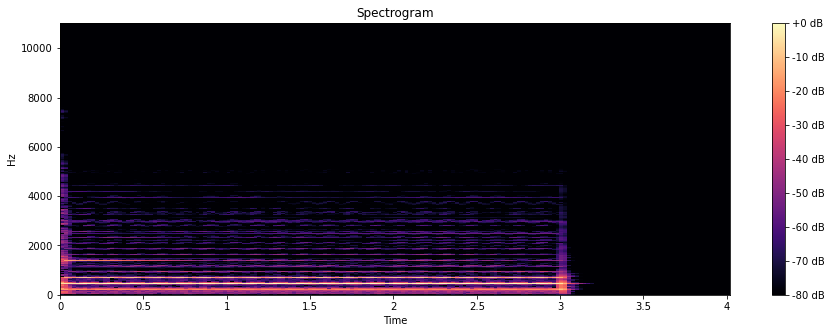

In [45]:

# spectrogram
D = np.abs(librosa.stft(y))
D_dB = librosa.amplitude_to_db(D, ref=np.max)

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(D_dB, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Spectrogram')


# Mel-Spectrogram

[Text(0.5, 1.0, 'Mel-Spectrogram')]

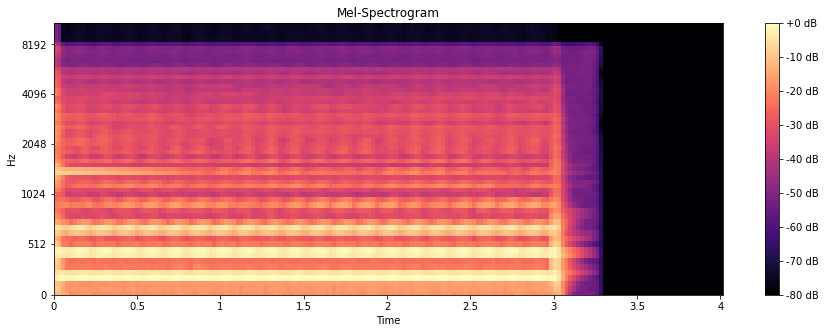

In [46]:
# Mel spectrogram
S = librosa.feature.melspectrogram(S=D, sr=sr, n_mels=60) # n_mels= 60
S_dB = librosa.power_to_db(S, ref=np.max)

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Mel-Spectrogram')


# MFCC

[Text(0.5, 1.0, 'MFCC')]

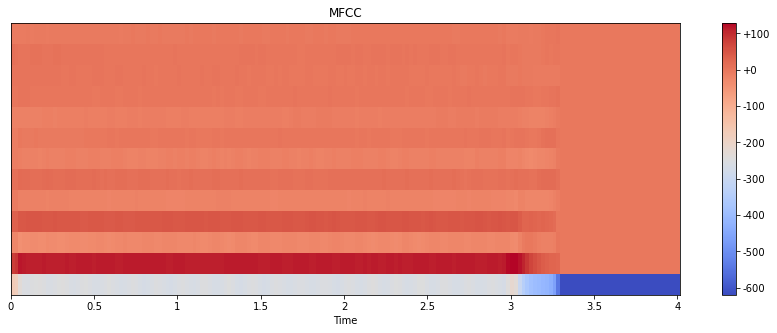

In [47]:
mfcc = librosa.feature.mfcc(S=S_dB, n_mfcc=13)  
#mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f")
ax.set(title='MFCC')



# Reconstructed Spectrogram from MFCC

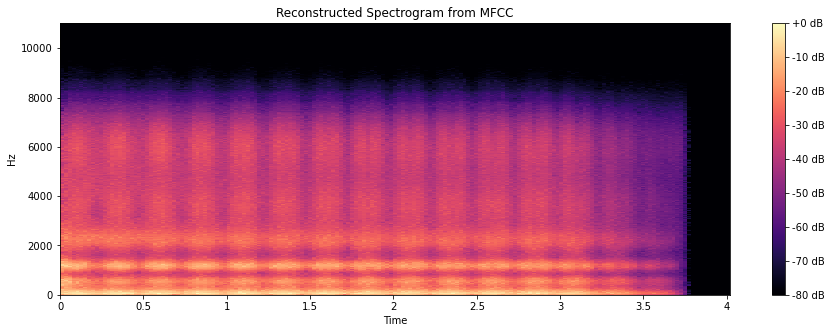

In [30]:
y_mfcc = librosa.feature.inverse.mfcc_to_audio(mfcc, n_mels = 60)
D_mfcc = np.abs(librosa.stft(y_mfcc))
D_mfcc_dB = librosa.amplitude_to_db(D_mfcc, ref=np.max)


# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(D_mfcc_dB, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Reconstructed Spectrogram from MFCC')


ipd.Audio(y_mfcc, rate=sr) 



# Display all together 

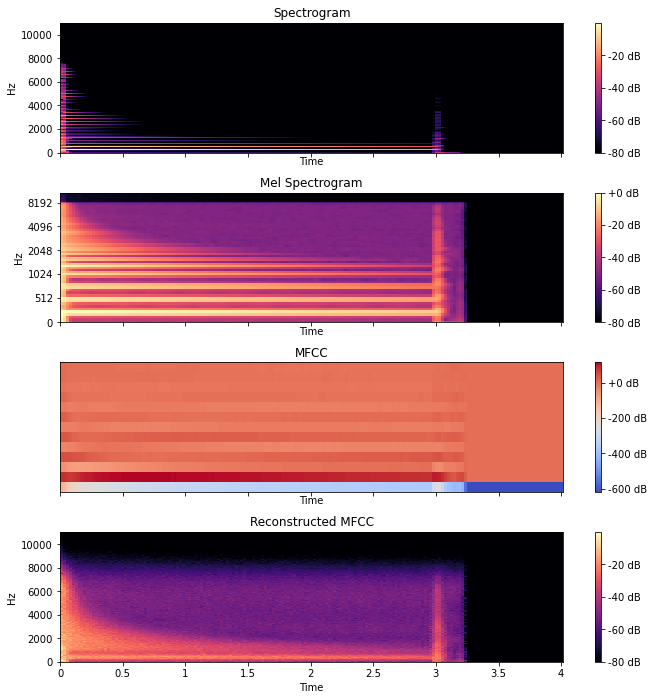

In [10]:

# display spectrogram
fig, ax = plt.subplots(nrows=4, sharex=True, figsize=(10,10))
fig.tight_layout(pad=3.0)

img = librosa.display.specshow(D_dB, x_axis='time', y_axis='linear', ax=ax[0])
fig.colorbar(img, ax=ax[0], format="%+2.f dB")
ax[0].set(title='Spectrogram')
ax[0].label_outer()

img = librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', ax=ax[1])
fig.colorbar(img, ax=ax[1], format="%+2.f dB")
ax[1].set(title='Mel Spectrogram')
ax[1].label_outer()

img = librosa.display.specshow(mfcc, x_axis='time', ax=ax[2])
fig.colorbar(img, ax=ax[2], format="%+2.f dB")
ax[2].set(title='MFCC')
ax[2].label_outer()


img = librosa.display.specshow(D_mfcc_dB, x_axis='time', y_axis='linear', ax=ax[3])
fig.colorbar(img, ax=ax[3], format="%+2.f dB")
ax[3].set(title='Reconstructed MFCC')
ax[3].label_outer()


# Spectral Statistics: Centroid

In [48]:
filename = "../audio/report/organ_electronic_004-058-100.wav"

y, sr = librosa.load(filename) 

print(y.shape)
print(sr)

ipd.Audio(y, rate=sr) 





(88200,)
22050


(1, 173)


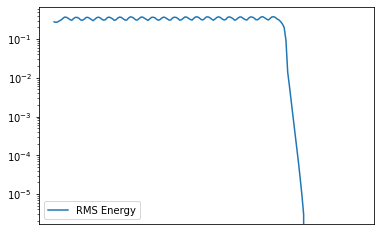

In [49]:
rms = librosa.feature.rms(y=y)
print(rms.shape)

fig, ax = plt.subplots(nrows=1, sharex=True)
times = librosa.times_like(rms)
ax.semilogy(times, rms[0], label='RMS Energy')
ax.set(xticks=[])
ax.legend()
ax.label_outer()
# librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
#                          y_axis='log', x_axis='time', ax=ax[1])

[Text(0.5, 1.0, 'MFCC')]

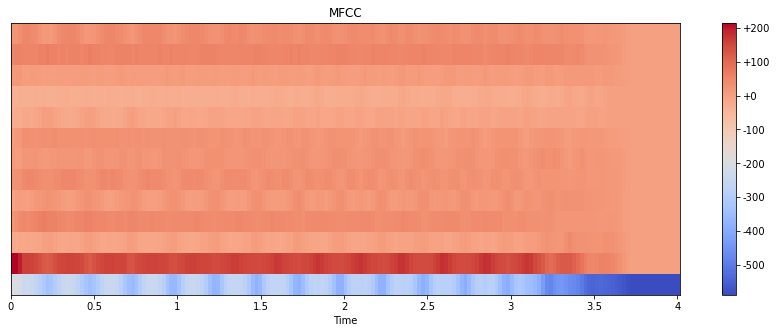

In [33]:
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f")
ax.set(title='MFCC')


[Text(0.5, 1.0, 'Spectrogram')]

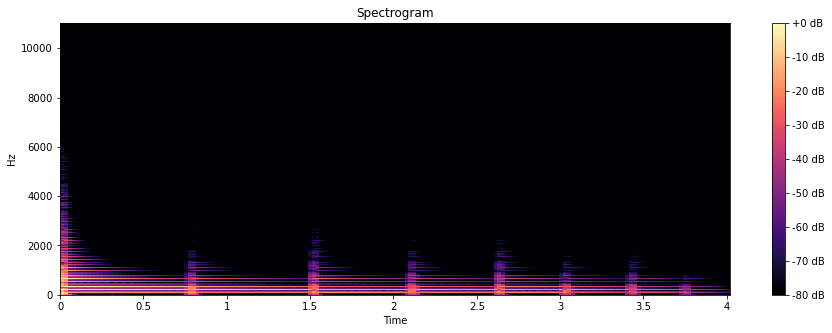

In [7]:
# spectrogram
D = np.abs(librosa.stft(y))
D_dB = librosa.amplitude_to_db(D, ref=np.max)

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(D_dB, x_axis='time', y_axis='linear', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.set(title='Spectrogram')



[Text(0.5, 1.0, 'Spectral bandwidth')]

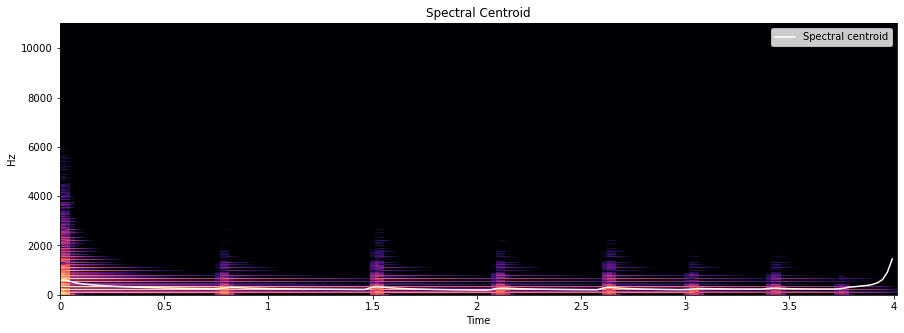

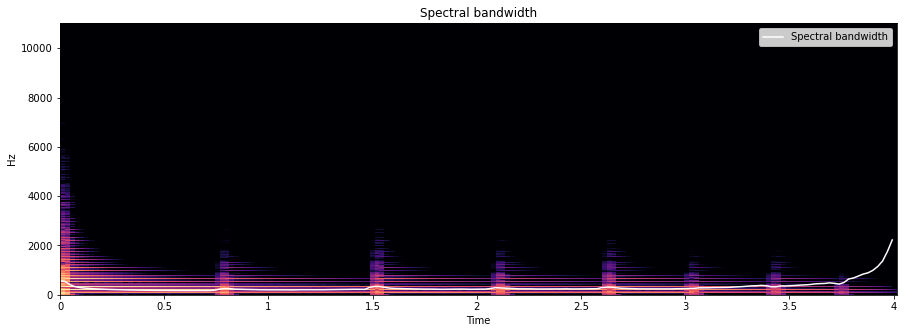

In [8]:
spec_centroid = librosa.feature.spectral_centroid(S=D)

times = librosa.times_like(spec_centroid)
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
librosa.display.specshow(D_dB, x_axis='time', y_axis='linear', ax=ax)
ax.plot(times, spec_centroid.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='Spectral Centroid')



spec_centroid = librosa.feature.spectral_bandwidth(S=D)

times = librosa.times_like(spec_centroid)
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
librosa.display.specshow(D_dB, x_axis='time', y_axis='linear', ax=ax)
ax.plot(times, spec_centroid.T, label='Spectral bandwidth', color='w')
ax.legend(loc='upper right')
ax.set(title='Spectral bandwidth')


# Chroma

In [9]:
filename = "../audio/piano_88keys_short_vel96_part2.wav"

y2, sr = librosa.load(filename)   
print(y2.shape)
print (sr)

ipd.Audio(y2, rate=sr) 


(1278900,)
22050


[Text(0.5, 1.0, 'Spectrogram')]

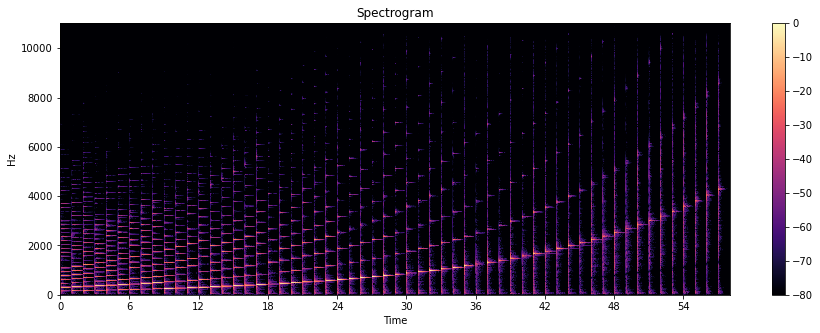

In [10]:
Y2 = librosa.stft(y2)
D2 = librosa.amplitude_to_db(np.abs(Y2), ref=np.max)

fig, ax = plt.subplots(figsize=(15, 5))
img = librosa.display.specshow(D2, y_axis='linear', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Spectrogram')



[Text(0.5, 1.0, 'Chromagram')]

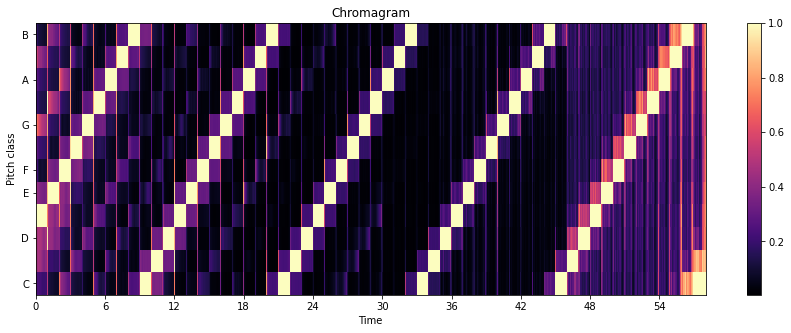

In [11]:
chroma2 = librosa.feature.chroma_stft(S=np.abs(Y2), sr=sr)

fig, ax = plt.subplots(figsize=(15, 5))
img = librosa.display.specshow(chroma2, y_axis='chroma', x_axis='time', ax=ax)
fig.colorbar(img, ax=ax)
ax.set(title='Chromagram')

(1, 2498)


NameError: name 'S' is not defined

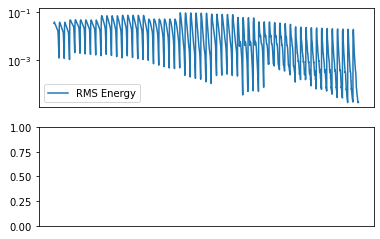

In [12]:
rms = librosa.feature.rms(y=y2)
print(rms.shape)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(rms)
ax[0].semilogy(times, rms[0], label='RMS Energy')
ax[0].set(xticks=[])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])

In [ ]:
filename = "../audio/brass_acoustic_000-060-100.wav"

y2, sr2 = librosa.load(filename)   
print(y2.shape)
print (sr2)

ipd.Audio(y2, rate=sr) 


# mfcc = librosa.feature.mfcc(S=S_dB, n_mfcc=13)  
mfccs = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=13)

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f")
ax.set(title='MFCC')



In [ ]:
filename = "../audio/guitar_acoustic_018-060-100.wav"

y2, sr2 = librosa.load(filename)   
print(y2.shape)
print (sr2)

ipd.Audio(y2, rate=sr) 


# mfcc = librosa.feature.mfcc(S=S_dB, n_mfcc=13)  
mfccs = librosa.feature.mfcc(y=y2, sr=sr2, n_mfcc=13)

# display spectrogram
fig, ax = plt.subplots(sharex=True, figsize=(15,5))
img = librosa.display.specshow(mfcc, x_axis='time', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f")
ax.set(title='MFCC')

